In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("Flight_Fare.xlsx")

data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Business Case:
    1. This problem is a regression problem.
    2. The dataset contains details about different flights, source, destination, duration of travel, etc.
    3. The project's main aim is to train a regression model with the given data to predict the fare of the upcoming 
    flights.

# Basic Checks:

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.tail(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


# Domain Analysis:
    Fare of the flights are hard to predict, it is very volatile. I.e. today we might check for price let say x and if we 
    check the fare for the same flight tomorrow it will not be the same. Many people think that it is impossibe to predict 
    the price of a flight ticket. But with the right data we can do that aswell.



### Here we have a dataset with 10683 records and 11 features (including the Fare feature)

Features:

    1. Airline - The company to which the flight belogs.
    2. Date_of_Journey - The date of the journey.
    3. Source - The source from which the flight takes off.
    4. Destination - The destination where the drops the customer/passenger.
    5. Route - The route taken which the flight takes to reach the destination.
    6. Dep_Time - The start time of the journey from the source.
    7. Arrival_Time - Time of arrival at the destination.
    8. Duration - Total duration of the travel.
    9. Total_Stops - No of stops between the source and destination.
    10.Additional_Info - Additional information about the flight.
    11.Price - The price of the ticket.
    
The Price is the dependant variable and other features are independant.

# EDA (Exploratry Data Analysis)

## Uni-variate Analysis

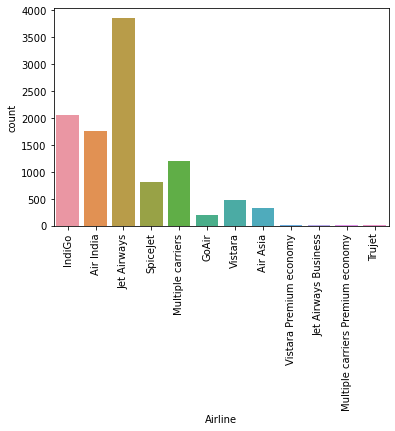

In [9]:
# AIRLINES:
sns.countplot(x='Airline',data=data)
plt.xticks(rotation = 90)
plt.show()

#### Data Insight:
    Most of the flights are owned by Jet Airways

In [10]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

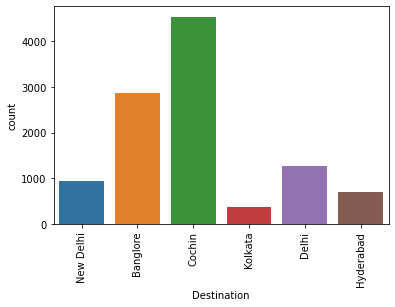

In [11]:
#destination:
sns.countplot(x='Destination',data=data)
plt.xticks(rotation = 90)
plt.show()

#### Data insight:
    Destination of most of the flights are Cochin

In [12]:
data['Destination'] = data['Destination'].replace('New Delhi','Delhi') # Renaming the New delhi as Delhi, as both are same.

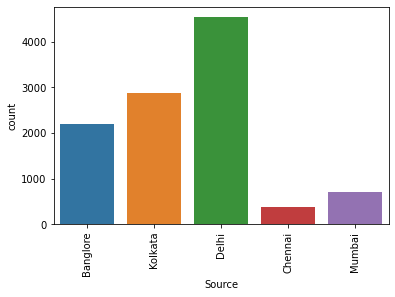

In [13]:
#Source:
sns.countplot(x='Source',data=data)
plt.xticks(rotation = 90)
plt.show()

#### Data insight:
    Most of the flight take off from Delhi

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

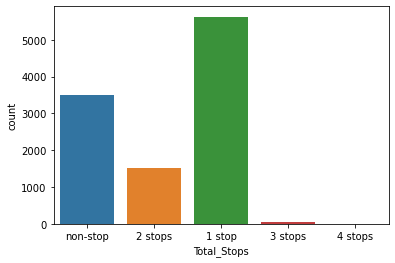

In [14]:
sns.countplot(x='Total_Stops',data=data)

#### Data insight:
    1. There are very few flights with more than 2 stops 
    2. Most of the flights take a single stop

In [15]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [16]:
for i in data.columns:
    print(data[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


<AxesSubplot:xlabel='Destination', ylabel='Price'>

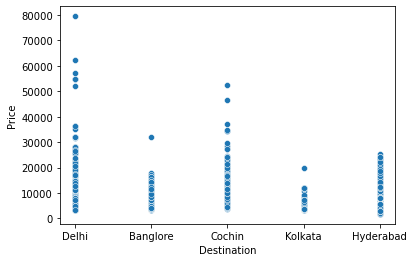

In [17]:
sns.scatterplot(x='Destination',y='Price',data=data)

#### Data Insight:
    Few Flight departing from Delhi are 50000 and highest of it costs 80000+

In [18]:
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Data Insights:
    
    1. Airlines: More than 35% flights are owned by Jet Airways.
    2. Source: Being the capital city of India 42% of flights take off from Delhi.
    3. Destination: 42% of the flights lands in Cochin and Kolkatta is being the least with 4%.
    4. Route: 2376 flights which is 22% of flights take the Route Delhi to Cochin with a stop in Bombay.
    5. Duration: Most of the flights travels around 1 to 3 hours
    6. Stops: about 53% of the flights have 1 stop between source and destination.
    7. Additional_info: Around 80% of the data is no info so we might drop this column.

## Bi-variate analysis

<AxesSubplot:xlabel='Source', ylabel='Price'>

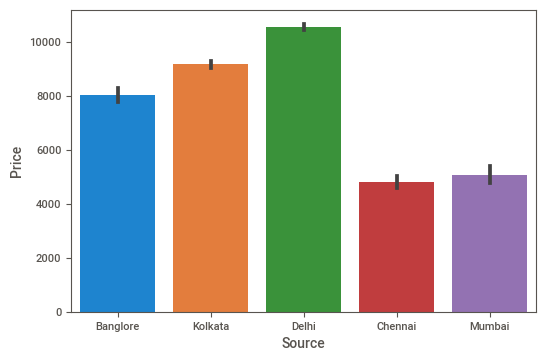

In [19]:
sns.barplot(x='Source',y='Price',data=data)

#### Data Insight:
    Average price of flights departing from Delhi are Higher

<AxesSubplot:xlabel='Destination', ylabel='Price'>

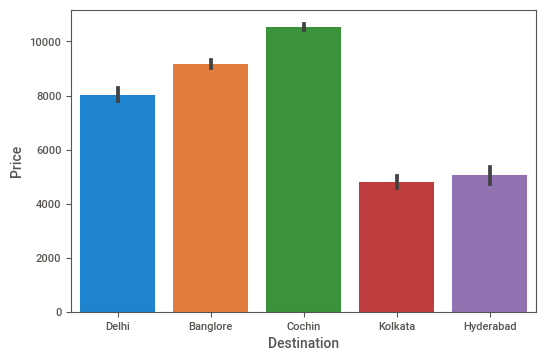

In [20]:
sns.barplot(x='Destination',y='Price',data=data)

#### Data Insight:
    Flights landing in Cochin costs a bit higher.

<AxesSubplot:xlabel='Price', ylabel='Airline'>

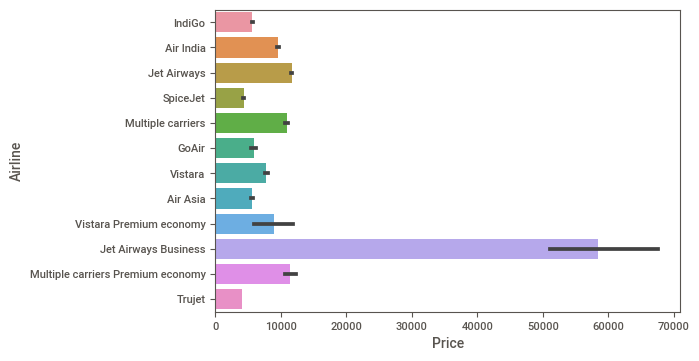

In [21]:
sns.barplot(x='Price',y='Airline',data=data)

#### Data Insights:
    Jet airways Business most expensive, might be because of the business class

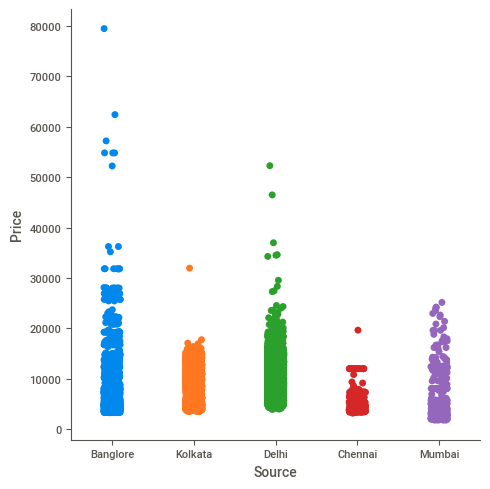

In [22]:
sns.catplot(y = "Price", x = "Source", data = data)

#### Data Insights:
    Few Flight departing from Delhi costs 80000+
    

<AxesSubplot:xlabel='Source', ylabel='Airline'>

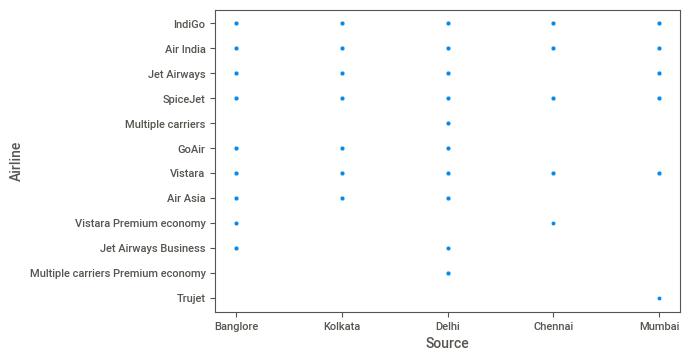

In [23]:
sns.scatterplot(x='Source',y='Airline',data=data)

#### Data Insight:
    1. IndiGo, Air India, SpiceJet, Vistara operates from all 5 Source.
    2. Jet Airways Do not operate from Chennai
    3. Multiple Carriers operates only from Delhi
    4. Trujet operates only from Mumbai

<AxesSubplot:xlabel='Destination', ylabel='Airline'>

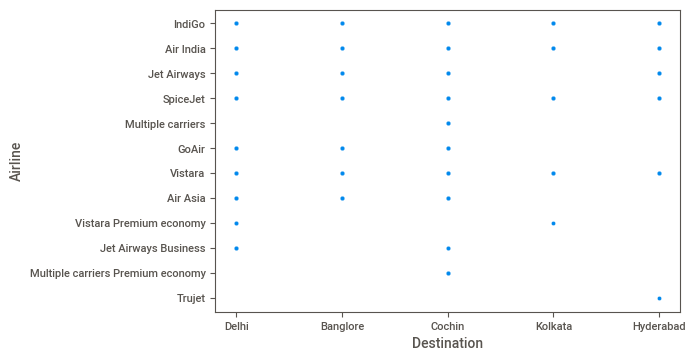

In [24]:
sns.scatterplot(x='Destination',y='Airline',data=data)

#### Data Insight:
    1. IndiGo, Air India, SpiceJet, Vistara operates to all 5 Destination.
    2. Jet Airways Do not operate to Kolkata.
    3. Multiple Carriers operates only to Cochin.
    4. Trujet operates only to Hyderabad.

## Multi variate Analysis

<AxesSubplot:xlabel='Price', ylabel='Airline'>

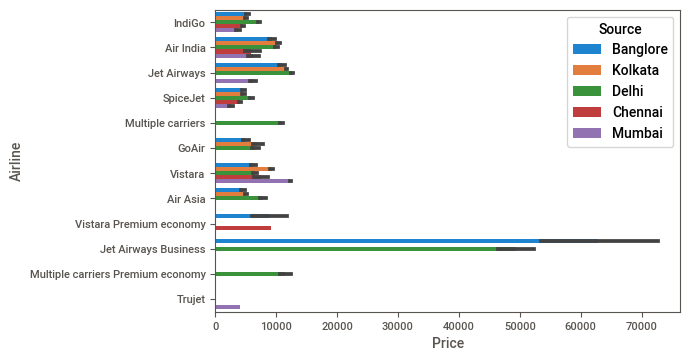

In [25]:
sns.barplot(x='Price',y='Airline',data=data, hue='Source')

#### Data Insight:
1. IndiGo, Air India, SpiceJet, Vistara operates from all 5 Source and to all 5 destinations.
2. Jet Airways Do not operate from Chennai and to Kolkata.
3. Multiple Carriers operates only from Delhi and lands only in Cochin.
4. Trujet operates only from Mumbai and lands only in Hyderabad.

<AxesSubplot:xlabel='Price', ylabel='Airline'>

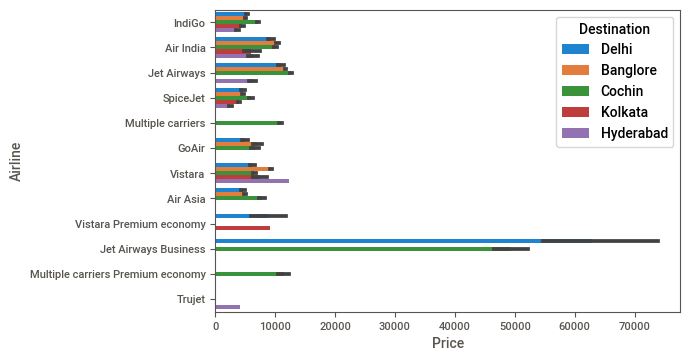

In [26]:
sns.barplot(x='Price',y='Airline',data=data, hue='Destination')

#### Data Insight:
    Jet Airways Business is the most expensive.

# Feature Engineering

In [27]:
data.head(2) 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### Dropping Unwanted Column

In [28]:
#  Dropping the Additional_info feature as it had more than 80% No info as data
data.drop('Additional_Info',axis=1,inplace =True)  
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648


### Extracting Date and Month from column Date_of_Journey

In [29]:
Day=[]
Month=[] # Creating empty lists to store the date and month in individual lists

In [30]:
for i in data.Date_of_Journey:
    Day.append((int)(i.split('/')[0]))
    Month.append((int)(i.split('/')[1])) 
#Splitting the date and month from each rows and appending it to the respective list

In [31]:
Day=pd.DataFrame(Day)
Month=pd.DataFrame(Month) 
# converting the list to dataframe

In [32]:
data=data.join(Day) 
data.rename(columns = {0:'Day'},inplace=True)
# Joining the Day dataframe with the Airline dataset and renaming the column as day

data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,9
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,1


In [33]:
data=data.join(Month)
data.rename(columns = {0:'Month'},inplace=True)
# Joining the Month dataframe with the Airline dataset and renaming the column as Month

data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,1,3


### Converting Duration to minutes

In [34]:
Minute=[] # Creating an empty list

In [35]:
for i in data.Duration:
    Dummy = i.strip()
    time=Dummy.split(' ')  #spliting the hours and minutes
    H=time[0]            
    hrs=(int)(H[:-1])*60  #Converting hours to minutes
    if((len(time))==2):
        mint=(int)(time[1][:-1])
        hrs=hrs+mint       
    Minute.append(hrs)       # Appending the minutes to the list



In [36]:
Minute=pd.DataFrame(Minute) #converting the list into Dataframe 

In [37]:
data=data.join(Minute)
data.rename(columns={0:'Dur_in_Minutes'},inplace=True)
#Joining the Minute dataframe to the Airline dataset 
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Dur_in_Minutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5,325
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,9,4,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4,180
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,1,3,160


In [38]:
data.drop(['Duration','Date_of_Journey'],axis=1,inplace=True) #Dropping the Duration and Date_of_Journey as they are been convertied into new numerical columns.

In [39]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Dur_in_Minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,7662,1,5,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,13882,9,6,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,6218,12,5,325
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,13302,1,3,285
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,non-stop,4107,9,4,150
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,non-stop,4145,27,4,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,non-stop,7229,27,4,180
10681,Vistara,Banglore,Delhi,BLR → DEL,11:30,14:10,non-stop,12648,1,3,160


### Converting Departure and Arraival as Times of Day

In [40]:
Dep=[]
Arr=[] # creating empty lists

In [41]:
#Dep_Time
for i in data.Dep_Time:
    time=(int)(i.split(':')[0])  #Splitting Time and converting it to Parts of the day
    if (time >= 5 and time < 11):
        Dep.append('Morning')
    elif (time >= 11 and time < 16):
        Dep.append('Afternoon')
    elif (time >= 16 and time < 21):
        Dep.append('Evening')
    elif ((time >= 21 and time <=24)or (time >= 0 and time < 5)):
        Dep.append('Night')

In [42]:
Dep=pd.DataFrame(Dep)
Dep #converting into dataframe

,0
0,Night
1,Morning
2,Morning
3,Evening
4,Evening
...,...
10678,Evening
10679,Evening
10680,Morning
10681,Afternoon


In [43]:
data=data.join(Dep)                                 #joining the dataframe with the Airline dataset
data.drop('Dep_Time',inplace=True,axis=1)           #Dropping the Old Departure time feature
data.rename(columns={0:'Dep_Time'},inplace=True)    #Renaming the new column to Dep_Time
data 

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Price,Day,Month,Dur_in_Minutes,Dep_Time
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,non-stop,3897,24,3,170,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,7662,1,5,445,Morning
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,13882,9,6,1140,Morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,6218,12,5,325,Evening
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,1 stop,13302,1,3,285,Evening
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,non-stop,4107,9,4,150,Evening
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,non-stop,4145,27,4,155,Evening
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,non-stop,7229,27,4,180,Morning
10681,Vistara,Banglore,Delhi,BLR → DEL,14:10,non-stop,12648,1,3,160,Afternoon


In [44]:
#Arrival Time
for i in data.Arrival_Time:    ##Splitting Arrival Time and converting it to Parts of the day
    time=(int)(i.split(':')[0])
    if (time >= 5 and time < 11):
        Arr.append('Morning')
    elif (time >= 11 and time < 16):
        Arr.append('Afternoon')
    elif (time >= 16 and time < 21):
        Arr.append('Evening')
    elif ((time >= 21 and time <=24)or (time >= 0 and time < 5)):
        Arr.append('Night')

In [45]:
Arr=pd.DataFrame(Arr)                                  #converting into dataframe
data=data.join(Arr)                                    #joining the dataframe with the Airline dataset
data.drop('Arrival_Time',inplace=True,axis=1)          #Dropping the Old Arrival time feature
data.rename(columns={0:'Arrival_Time'},inplace=True)   #Renaming the new column to Arrival_Time

data

,Airline,Source,Destination,Route,Total_Stops,Price,Day,Month,Dur_in_Minutes,Dep_Time,Arrival_Time
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,3897,24,3,170,Night,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,445,Morning,Afternoon
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,1140,Morning,Night
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,325,Evening,Night
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,13302,1,3,285,Evening,Night
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,4107,9,4,150,Evening,Night
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,4145,27,4,155,Evening,Night
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,7229,27,4,180,Morning,Afternoon
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,12648,1,3,160,Afternoon,Afternoon


## Handling Null/Missing values

In [46]:
data.isnull().sum() #Checking for null values

Airline           0
Source            0
Destination       0
Route             1
Total_Stops       1
Price             0
Day               0
Month             0
Dur_in_Minutes    0
Dep_Time          0
Arrival_Time      0
dtype: int64

In [47]:
#only 1 row with missing value or NA so we can delete it since we have a huge data set

data.dropna(inplace=True)

### Converting Categorical to Numerical

In [48]:
from sklearn.preprocessing import LabelEncoder  #importing lable Encoder

le=LabelEncoder()

In [49]:
data.head(1)

,Airline,Source,Destination,Route,Total_Stops,Price,Day,Month,Dur_in_Minutes,Dep_Time,Arrival_Time
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,3897,24,3,170,Night,Night


In [50]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.Route=le.fit_transform(data.Route)
data.Dep_Time=le.fit_transform(data.Dep_Time)
data.Arrival_Time=le.fit_transform(data.Arrival_Time) 

#converting categorical to numerical using Label Encoder

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Airline         10682 non-null  int32
 1   Source          10682 non-null  int32
 2   Destination     10682 non-null  int32
 3   Route           10682 non-null  int32
 4   Total_Stops     10682 non-null  int32
 5   Price           10682 non-null  int64
 6   Day             10682 non-null  int64
 7   Month           10682 non-null  int64
 8   Dur_in_Minutes  10682 non-null  int64
 9   Dep_Time        10682 non-null  int32
 10  Arrival_Time    10682 non-null  int32
dtypes: int32(7), int64(4)
memory usage: 709.4 KB


### Dropping Duplicate Rows

In [52]:
data.duplicated().sum()

310

In [53]:
data.drop_duplicates(inplace=True) #Dropping duplicate rows

# Feature Selection

<AxesSubplot:>

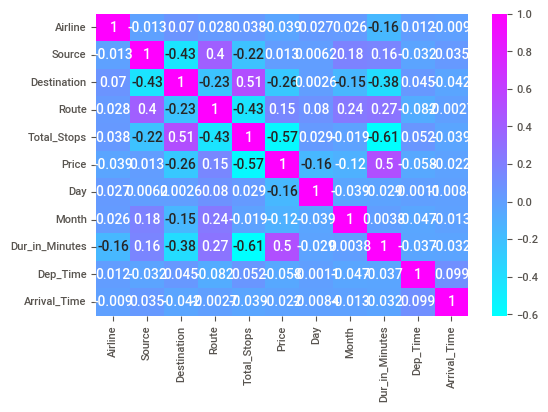

In [54]:
sns.heatmap(data.corr(),annot=True,cmap='cool')

#### Data Insight:
    None of the features are highly correlated

# Model Building

In [55]:
## creating X and y
x=data.drop('Price',axis=1)
y=data['Price']

In [56]:
#Scaling

from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_Scaled=Scaler.fit_transform(x)

In [57]:
# creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_Scaled,y,random_state=3)

## Linear Regression

In [58]:
#importing Linear regression algorithm and training the algorithm
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [59]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [60]:
#Train data prediction
y_train_predicted = lin_reg.predict(x_train)

In [61]:
#Model Evaluation
r1_train = r2_score(y_train, y_train_predicted)
print("The training accuracy using R2 is:", r1_train*100,'%')
Train_adjusted_r2 = 1-((1-r1_train)*(100-1))/(100-7-1)
print("The training accuracy using adjusted R2 is:",Train_adjusted_r2*100,'%')

The training accuracy using R2 is: 40.72007523680151 %
The training accuracy using adjusted R2 is: 36.20964617873206 %


In [62]:
#Test data prediction
y_test_predicted = lin_reg.predict(x_test)

In [63]:
#Model Evaluation
r1_test = r2_score(y_test, y_test_predicted)
print("The testing accuracy using R2 is:", r1_test*100,'%')
test_adjusted_r2 = 1-((1-r1_test)*(100-1))/(100-7-1)
print("The testing accuracy using adjusted R2 is:",test_adjusted_r2*100,'%')

The testing accuracy using R2 is: 42.39333288985452 %
The testing accuracy using adjusted R2 is: 38.01021691408258 %


In [64]:
## Checking cross validation score

scores=cross_val_score(lin_reg,x,y,cv=3,scoring='r2')
print(scores)
print('Cross validation score:',scores.mean())
print('std:',scores.std())

[0.4039654  0.43033343 0.39522752]
Cross validation score: 0.4098421149089992
std: 0.014922198256684052


## Using Gradient Boosting

In [65]:
# importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(x_train,y_train) ## fitting the data


GradientBoostingRegressor()

In [66]:
#Train data prediction
y_train_predicted = gbm.predict(x_train)

In [67]:
#Model Evaluation
r2_train= r2_score(y_train, y_train_predicted)
print("The training accuracy using R2 is:", r2_train*100,'%')
Train_adjusted_r2 = 1-((1-r2_train)*(100-1))/(100-7-1)
print("The training accuracy using adjusted R2 is:",Train_adjusted_r2*100,'%')

The training accuracy using R2 is: 79.1354433316758 %
The training accuracy using adjusted R2 is: 77.54792271560767 %


In [68]:
y_gbm=gbm.predict(x_test)#predicting the price

In [69]:
# evaluation the model

r2_test = r2_score(y_test, y_gbm)
print("The test accuracy using R2 is:", r2_test*100,'%')
test_adjusted_r2 = 1-((1-r2_test)*(400-1))/(400-7-1)
print("The test accuracy using adjusted R2 is:", test_adjusted_r2*100,'%')

The test accuracy using R2 is: 74.53343064955999 %
The test accuracy using adjusted R2 is: 74.07867048258785 %


In [70]:
# Checking cross validation score

scores=cross_val_score(gbm,x,y,cv=10,scoring='r2')
print(scores)
print('Cross validation score:',scores.mean())
print('std:',scores.std())

[0.79350003 0.73290256 0.73879887 0.77317929 0.80142715 0.80414739
 0.77311074 0.78047339 0.75146661 0.77179342]
Cross validation score: 0.7720799447993675
std: 0.023427781432336793


## Using KNN Regressor

In [71]:
from sklearn.neighbors import KNeighborsRegressor
##taking optimal k to determine how many nearest neighbor
##create a list to store the error values for each k
error_rate=[]
##will take some time
for i in range(1,11):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
error_rate

[0.7543386039336676,
 0.8920169687620517,
 0.9417662938681064,
 0.9622059390667181,
 0.9791747011183957,
 0.9857308137292711,
 0.9899730042421905,
 0.9922869263401466,
 0.9934438873891246,
 0.9953721558040879]

Text(0, 0.5, 'error_rate')

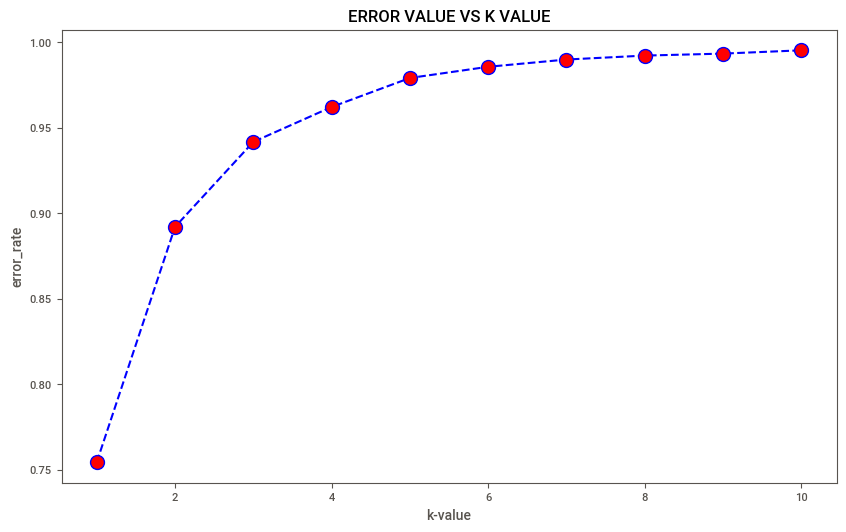

In [72]:
#lets plot the k-value and error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('ERROR VALUE VS K VALUE')
plt.xlabel('k-value')
plt.ylabel('error_rate')

In [73]:
#Error calculation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
rmse_val=[]
for k in range(1,11):
    k=k+1
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train,y_train)#fit the model
    pred=model.predict(x_test)#make prediction on test set
    error=np.sqrt(mean_squared_error(y_test,pred))#calculate rmse
    rmse_val.append(error)
    print('RMSE value for k=','is:',error)

RMSE value for k= is: 2663.0756039200933
RMSE value for k= is: 2523.865289599041
RMSE value for k= is: 2494.2738623282853
RMSE value for k= is: 2512.1630907463573
RMSE value for k= is: 2532.8103747789714
RMSE value for k= is: 2514.362644033282
RMSE value for k= is: 2554.668388226635
RMSE value for k= is: 2567.5748963778096
RMSE value for k= is: 2582.0575743492136
RMSE value for k= is: 2584.474927932034


In [74]:
KNN1=KNeighborsRegressor(n_neighbors=4) ## model object creation
KNN1.fit(x_train,y_train)  ## fitting the model


KNeighborsRegressor(n_neighbors=4)

In [75]:
y_hat_knn=KNN1.predict(x_train) ## getting the predict from created model

In [76]:
#Model Evaluation
r3_train= r2_score(y_train, y_hat_knn)
print("The training accuracy using R2 is:", r3_train*100,'%')
Train_adjusted_r2 = 1-((1-r3_train)*(100-1))/(100-7-1)
print("The training accuracy using adjusted R2 is:",test_adjusted_r2*100,'%')

The training accuracy using R2 is: 83.20704600255313 %
The training accuracy using adjusted R2 is: 74.07867048258785 %


In [77]:
y_hat_knn=KNN1.predict(x_test) ## getting the predict from created model

In [78]:
#Model Evaluation
r3_test = r2_score(y_test, y_hat_knn)
print("The testing accuracy using R2 is:", r3_test*100,'%')
test_adjusted_r2 = 1-((1-r3_test)*(100-1))/(100-7-1)
print("The testing accuracy using adjusted R2 is:",test_adjusted_r2*100,'%')

The testing accuracy using R2 is: 69.24333589003038 %
The testing accuracy using adjusted R2 is: 66.90315492514138 %


In [79]:
# Checking cross validation score

scores=cross_val_score(knn,x,y,cv=4,scoring='r2')
print(scores)
print('Cross validation score:',scores.mean())
print('std:',scores.std())

[0.58595779 0.54965764 0.55110799 0.52504032]
Cross validation score: 0.5529409367191053
std: 0.021695024252353774


## Using XGBoosting

In [80]:
# model creation
from xgboost import XGBRegressor#importing the model library
xgb=XGBRegressor() ## object creation
xgb.fit(x_train,y_train)# fitting the data


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [81]:
y_hat=xgb.predict(x_train)#predicting the price

In [82]:
r4_train = r2_score(y_train, y_hat)
print("The training accuracy using R2 is:", r4_train*100,'%')
train_adjusted_r2 = 1-((1-r4_train)*(400-1))/(400-7-1)
print("The training accuracy using adjusted R2 is:", train_adjusted_r2*100,'%')

The training accuracy using R2 is: 92.72337031119532 %
The training accuracy using adjusted R2 is: 92.59343049532382 %


In [83]:
y_hat=xgb.predict(x_test)#predicting the price

In [84]:
r4_test = r2_score(y_test, y_hat)
print("The test accuracy using R2 is:", r4_test*100,'%')
testing_adjusted_r2 = 1-((1-r4_test)*(400-1))/(400-7-1)
print("The test accuracy using adjusted R2 is:", testing_adjusted_r2*100,'%')

The test accuracy using R2 is: 83.27505228175896 %
The test accuracy using adjusted R2 is: 82.97639250107608 %


In [85]:
# Checking cross validation score

scores=cross_val_score(xgb,x,y,cv=3,scoring='r2')
print(scores)
print('Cross validation score:',scores.mean())
print('std:',scores.std())

[0.81790542 0.84737284 0.80762003]
Cross validation score: 0.824299432341297
std: 0.01684703682217133


## SVM

In [86]:
#support vector REgressor model
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [87]:
#predicting
y_trainpred=svr.predict(x_train)

In [88]:
r5_train = r2_score(y_train, y_trainpred)
print("The training accuracy using R2 is:", r5_train*100,'%')
train_adjusted_r2 = 1-((1-r5_train)*(400-1))/(400-7-1)
print("The training accuracy using adjusted R2 is:", train_adjusted_r2*100,'%')

The training accuracy using R2 is: 3.99762879410569 %
The training accuracy using adjusted R2 is: 2.2833007368575853 %


In [89]:
#predicting
y_testpred=svr.predict(x_test)

In [90]:
r5_test = r2_score(y_test, y_testpred)
print("The test accuracy using R2 is:", r5_test*100,'%')
testing_adjusted_r2 = 1-((1-r5_test)*(400-1))/(400-7-1)
print("The test accuracy using adjusted R2 is:", testing_adjusted_r2*100,'%')

The test accuracy using R2 is: 3.734177406855732 %
The test accuracy using adjusted R2 is: 2.015144860549578 %


In [91]:
# Checking cross validation score

scores=cross_val_score(svr,x,y,cv=3,scoring='r2')
print(scores)
print('Cross validation score:',scores.mean())
print('std:',scores.std())

[0.10870863 0.1429788  0.12857846]
Cross validation score: 0.1267552991978119
std: 0.014050009446208166


## Decision Tree

In [92]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor() #object creation for decision tree
dt.fit(x_train,y_train)# training the model


DecisionTreeRegressor()

In [93]:
#predicting
y_trainpred=dt.predict(x_train)

In [94]:
r6_train = r2_score(y_train, y_trainpred)
print("The training accuracy using R2 is:", r6_train*100,'%')
train_adjusted_r2 = 1-((1-r6_train)*(400-1))/(400-7-1)
print("The training accuracy using adjusted R2 is:", train_adjusted_r2*100,'%')

The training accuracy using R2 is: 96.42381937484089 %
The training accuracy using adjusted R2 is: 96.35995900653448 %


In [95]:
y_hat=dt.predict(x_test)

In [96]:
r6_test = r2_score(y_test, y_hat)
print("The test accuracy using R2 is:", r6_test*100,'%')
testing_adjusted_r2 = 1-((1-r6_test)*(400-1))/(400-7-1)
print("The test accuracy using adjusted R2 is:", testing_adjusted_r2*100,'%')

The test accuracy using R2 is: 70.70410014811483 %
The test accuracy using adjusted R2 is: 70.18095907933117 %


In [97]:
# Checking cross validation score

scores=cross_val_score(dt,x,y,cv=3,scoring='r2')
print(scores)
print('Cross validation score:',scores.mean())
print('std:',scores.std())

[0.64417176 0.67091019 0.63392159]
Cross validation score: 0.6496678453153298
std: 0.015592613852027813


## Random forest

In [98]:
from sklearn.ensemble import RandomForestRegressor #importing the package
rf=RandomForestRegressor(n_estimators=5) #object creation
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5)

In [99]:
#predicting
y_trainpred=rf.predict(x_train)

In [100]:
r7_train = r2_score(y_train, y_trainpred)
print("The training accuracy using R2 is:", r7_train*100,'%')
train_adjusted_r2 = 1-((1-r7_train)*(400-1))/(400-7-1)
print("The training accuracy using adjusted R2 is:", train_adjusted_r2*100,'%')

The training accuracy using R2 is: 93.06214224185835 %
The training accuracy using adjusted R2 is: 92.93825192474867 %


In [101]:
y_hat=rf.predict(x_test)

In [102]:
r7_test = r2_score(y_test, y_hat)
print("The test accuracy using R2 is:", r7_test*100,'%')
testing_adjusted_r2 = 1-((1-r7_test)*(400-1))/(400-7-1)
print("The test accuracy using adjusted R2 is:", testing_adjusted_r2*100,'%')

The test accuracy using R2 is: 76.37895071206859 %
The test accuracy using adjusted R2 is: 75.95714626049838 %


In [103]:
# Checking cross validation score

scores=cross_val_score(rf,x,y,cv=3,scoring='r2')
print(scores)
print('Cross validation score:',scores.mean())
print('std:',scores.std())

[0.76134608 0.76352178 0.72628888]
Cross validation score: 0.7503855779047992
std: 0.017062077167181732


## Bagging

In [104]:
# Using bagging
from sklearn.ensemble import BaggingRegressor#import bagging 
bag=BaggingRegressor(base_estimator=xgb,n_estimators=60) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
bag.fit(x_train,y_train) ## fitting the model


BaggingRegressor(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None, gamma=0,
                                             gpu_id=-1, grow_policy='depthwise',
                                             importance_type=None,
                                             interaction_constraints='',
                                             learning_rate=0.300000012,
                                             max_bin=256, max_cat_to_onehot=4,
                                             max_delta_step=0, max_depth=6,
                                             max_leaves=0, min_child_weight=1,
                                             missing=nan,
                                             monotone_constraints='()',
                                             n_estimators=100, n_jobs=0,
                                             num_parallel_tree=1,
                                             predictor='auto', random_state=0,
                                             reg_alpha=0, reg_lambda=1, ...),
                 n_estimators=60)

In [105]:
y_hat_bag=bag.predict(x_train) ## getting the prediction

In [106]:
r8_train = r2_score(y_train, y_hat_bag)
print("The training accuracy using R2 is:", r8_train*100,'%')
train_adjusted_r2 = 1-((1-r8_train)*(400-1))/(400-7-1)
print("The training accuracy using adjusted R2 is:", train_adjusted_r2*100,'%')

The training accuracy using R2 is: 91.89204895720479 %
The training accuracy using adjusted R2 is: 91.74726411715488 %


In [107]:
y_hat_bag=bag.predict(x_test) ## getting the prediction

In [108]:
r8_test = r2_score(y_test, y_hat_bag)
print("The test accuracy using R2 is:", r8_test*100,'%')
testing_adjusted_r2 = 1-((1-r8_test)*(400-1))/(400-7-1)
print("The test accuracy using adjusted R2 is:", testing_adjusted_r2*100,'%')

The test accuracy using R2 is: 82.77518589392902 %
The test accuracy using adjusted R2 is: 82.46759992774919 %


In [109]:
# Checking cross validation score

scores=cross_val_score(bag,x,y,cv=3,scoring='r2')
print(scores)
print('Cross validation score:',scores.mean())
print('std:',scores.std())

[0.82555457 0.85033516 0.81428824]
Cross validation score: 0.8300593264407037
std: 0.01505688633907091


# Comparing Results

In [110]:
# Model Results
metric_results= {'Model': ['Linear Regression','GradientBoosting Regressor','KNeighbors Regressor','XGBoost Regressor',
                          'SVM Regressor','DecisionTree regressor','RandomForest Regressor','Bagging Regressor'], 
                 'R2 Score': [r1_train*100, r2_train*100, r3_train*100,r4_train*100,
                              r5_train*100,r6_train*100,r7_train*100,r8_train*100]}
metrics_Train= pd.DataFrame(metric_results)
metrics_Train

,Model,R2 Score
0,Linear Regression,40.720075
1,GradientBoosting Regressor,79.135443
2,KNeighbors Regressor,83.207046
3,XGBoost Regressor,92.723370
4,SVM Regressor,3.997629
5,DecisionTree regressor,96.423819
6,RandomForest Regressor,93.062142
7,Bagging Regressor,91.892049


In [111]:
# Model Results
metric_results_Test= {'Model': ['Linear Regression','GradientBoosting Regressor','KNeighbors Regressor','XGBoost Regressor', 
                           'SVM Regressor','DesicionTree Regressor','RandomForest Regressor','Bagging Regressor'], 
                 'R2 score': [r1_test*100, r2_test*100, r3_test*100,r4_test*100,
                              r5_test*100,r6_test*100,r7_test*100,r8_test*100]}
metrics_Test= pd.DataFrame(metric_results_Test)
metrics_Test

,Model,R2 score
0,Linear Regression,42.393333
1,GradientBoosting Regressor,74.533431
2,KNeighbors Regressor,69.243336
3,XGBoost Regressor,83.275052
4,SVM Regressor,3.734177
5,DesicionTree Regressor,70.704100
6,RandomForest Regressor,76.378951
7,Bagging Regressor,82.775186


# Conclusion:
    From the above comparision of ML regression models we find that the R2 Score and cross validation score of XGBoost is
    comparitively higher than all other algorithms, in both training and testing cases so we conclude that XGBoost Regressor is the best model for this dataset.

#### The R2 score of the XGBoost regressor model for Airline dataset is 92.723370.